# Investigacion 2: 5 Modelos Supervisados

-Cargamos dataset y librerias necesarias

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt

Preparamos los datos para utilizarlos en los modelos de entrenamiento

In [2]:
Paises_data = pd.read_csv("62_Paises_clean_data.csv")

#Separamos los targets de los features y los trainings de los tests
Data_Features = Paises_data.iloc[:,1:13]
Target_pobreza = Paises_data.iloc[:,13:15]
Features_train, Features_test, Pobreza_train, Pobreza_test = train_test_split(
    Data_Features, Target_pobreza, test_size=0.2, random_state=6)

Pobreza_train = Pobreza_train.apply(lambda x: [y if y < 100 else 100 for y in x])
Pobreza_train = Pobreza_train.apply(lambda x: [y if y >= 0 else 0 for y in x])

## Linear Regression
Se han elegido como objetivos a analizar la pobreza, tanto en funcion de la linea nacional como aquella referida a ganar mas de 5 dolares por dia, que es internacional. Se puede mostrar al final que existe un balance entre el training y el test, lo que se interpreta como un modelo fit.

In [3]:
Pobreza_Regresion = linear_model.LinearRegression() #Creamos el objeto de regresion lineal
Pobreza_Regresion.fit(Features_train, Pobreza_train) #Entrenamos el modelo utilizando los sets de training
Predicciones_Pobreza = Pobreza_Regresion.predict(Features_test) #Hacemos predicciones utilizando el set de testing

#Se presentan los resultados obtenidos
print('Mean square error: %.2f' % mean_squared_error(Pobreza_test, Predicciones_Pobreza)) #MSE
print('Coeficiente de determinacion: %.2f' % r2_score(Pobreza_test, Predicciones_Pobreza)) # 1.00 = perfecto
print('Scores[Train, Test]: \n', [Pobreza_Regresion.score(Features_train, Pobreza_train),Pobreza_Regresion.score(Features_test, Pobreza_test)])

Mean square error: 104.07
Coeficiente de determinacion: 0.70
Scores[Train, Test]: 
 [0.711233936409424, 0.6994285798676005]


## Logistic Regression

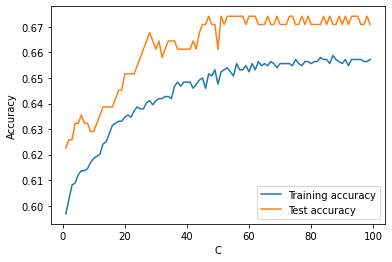

In [4]:
training_acc = []
test_acc = []
rango = range(1, 100)
for Hiper_Parametro in rango:
    Regresion_Logistica = LogisticRegression(C=Hiper_Parametro, solver='liblinear')
    Pobreza_train_Clases = Pobreza_train//10*10+10 #Ahora la Pobreza es un numero de categoria
    Pobreza_test_Clases = Pobreza_test//10*10+10 
    Pobreza_train_Clases = Pobreza_train_Clases.iloc[:,1:2].to_numpy(dtype=int).ravel(order='C')
    Pobreza_test_Clases = Pobreza_test_Clases.iloc[:,1:2].to_numpy(dtype=int).ravel(order='C')
    Regresion_Logistica.fit(Features_train, Pobreza_train_Clases)
    Predicciones_Pobreza = Regresion_Logistica.predict(Features_test) #Hacemos predicciones utilizando el set de testing
    training_acc.append(Regresion_Logistica.score(Features_train, Pobreza_train_Clases))
    test_acc.append(Regresion_Logistica.score(Features_test, Pobreza_test_Clases))
plt.plot(rango, training_acc, label="Training accuracy")
plt.plot(rango, test_acc, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

Elegimos por lo tanto, un valor de C=60 donde tenemos tanto al Test como al Training score en los mejores valores posibles sin aumentar dicho hiperparametro aun mas.

## K Neighbors

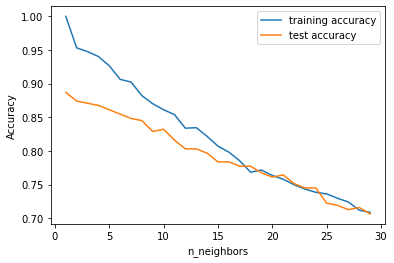

In [5]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 30)
for n_neighbors in neighbors_settings: # se construye el modelo de clasificacion
    KNeighbors = KNeighborsClassifier(n_neighbors=n_neighbors)
    KNeighbors.fit(Features_train, Pobreza_train_Clases)
    training_accuracy.append(KNeighbors.score(Features_train, Pobreza_train_Clases))
    test_accuracy.append(KNeighbors.score(Features_test, Pobreza_test_Clases))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

El punto donde ambos Scores se empatan seria el mas ideoneo para un modelo fit. Por lo tanto elegimos entrenar el modelo con 18 vecinos.

## Decision Trees

Procedemos como en el casos anteriores.


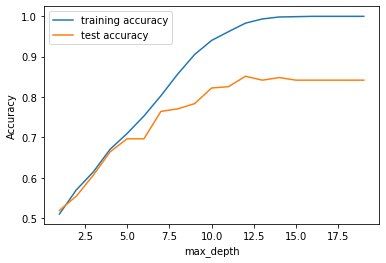

In [6]:
training_accuracy = []
test_accuracy = []
max_depth_settings = range(1, 20)
for i_max_depth in max_depth_settings: # se construye el modelo de clasificacion
    Arbol = DecisionTreeClassifier(max_depth=i_max_depth, random_state=0)
    Arbol.fit(Features_train, Pobreza_train_Clases)
    training_accuracy.append(Arbol.score(Features_train, Pobreza_train_Clases))
    test_accuracy.append(Arbol.score(Features_test, Pobreza_test_Clases))
plt.plot(max_depth_settings, training_accuracy, label="training accuracy")
plt.plot(max_depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()

A partir de un depth de max = 5 vemos como el test accuracy se separa del training accuracy, pero aun da una mejora significativa cuando max_depth = 7, por lo que se le considera el valor optimo.

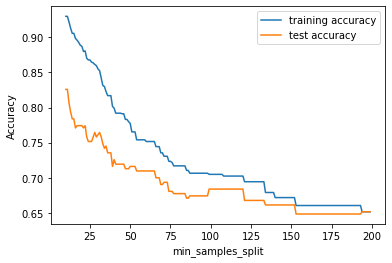

In [7]:
training_accuracy = []
test_accuracy = []
min_samples_split_settings = range(10, 200)
for i_min in min_samples_split_settings: # se construye el modelo de clasificacion
    Arbol = DecisionTreeClassifier(min_samples_split=i_min, random_state=0)
    Arbol.fit(Features_train, Pobreza_train_Clases)
    training_accuracy.append(Arbol.score(Features_train, Pobreza_train_Clases))
    test_accuracy.append(Arbol.score(Features_test, Pobreza_test_Clases))
plt.plot(min_samples_split_settings, training_accuracy, label="training accuracy")
plt.plot(min_samples_split_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("min_samples_split")
plt.legend()

Notese que con el hiperparametro fijado en algun valor entre 100 y 120 se tiene el modelo mas equilibrado sin perder mas precision. Sin embargo, al comparar estos resultados con el obtenido cuando max_depth = 7 para el caso anterior, se puede ver una clara superioridad de aquel. Por lo tanto el hiperparametro a elegir en este caso seria el del caso anterior en 7.

## Random Forrest

Y para este quinto ejemplo se ha elegido el metodo del Random Forrest para implementarlo en nuestro set de datos.

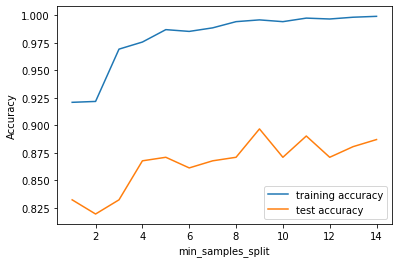

In [8]:
#rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

training_accuracy = []
test_accuracy = []
n_estimators_settings = range(1, 15)
for i_estimators in n_estimators_settings: # se construye el modelo de clasificacion
    Bosque = RandomForestClassifier(n_estimators=i_estimators)
    Bosque.fit(Features_train, Pobreza_train_Clases)
    training_accuracy.append(Bosque.score(Features_train, Pobreza_train_Clases))
    test_accuracy.append(Bosque.score(Features_test, Pobreza_test_Clases))
plt.plot(n_estimators_settings, training_accuracy, label="training accuracy")
plt.plot(n_estimators_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("min_samples_split")
plt.legend()

Con este metodo tenemos una muy buena precision con apenas 5 estimadores. Aumentar dichos estimadores solo nos conduce un escenario de overfit y casi ninguna mejora en el accuracy del testing.

## Fin